(i) Find $η_L$ numerically, assuming $c_0 = \sqrt{\pi}$ and $β = 1$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

In [3]:
def f(x):
    """
    Function: f(x) = x - e^(-x^2)/erf(x)
    We want to find the root where f(x) = 0
    """
    return x - np.exp(-x**2) / erf(x)

In [7]:
def df_dx(x):
    """
    Derivative: f'(x) = 1 - d/dx[e^(-x^2)/erf(x)]
    Using quotient rule: d/dx[u/v] = (v*u' - u*v')/v^2
    where u = e^(-x^2), v = erf(x)
    u' = -2x*e^(-x^2)
    v' = (2/√π)*e^(-x^2)
    """
    exp_term = np.exp(-x**2)
    erf_term = erf(x)

    # u = e^(-x^2), u' = -2x*e^(-x^2)
    u = exp_term
    u_prime = -2 * x * exp_term

    # v = erf(x), v' = (2/√π)*e^(-x^2)
    v = erf_term
    v_prime = (2 / np.sqrt(np.pi)) * exp_term

    # Quotient rule: (v*u' - u*v')/v^2
    quotient_derivative = (v * u_prime - u * v_prime) / (v**2)

    return 1 - quotient_derivative

In [10]:
def newton_raphson(x0, tol=1e-10, max_iter=100):
    x = x0

    for i in range(max_iter):
        fx = f(x)
        dfx = df_dx(x)
        x_new = x - fx / dfx
        error = abs(x_new - x)

        if error < tol:
            print(f"Root found: x = {x_new:.10f}")
            return x_new

        x = x_new

    raise ValueError("Maximum iterations reached! The method did not converge.")

In [13]:
x = newton_raphson(0.5)

Root found: x = 0.7677514365


(ii) Plot of $L(t)$

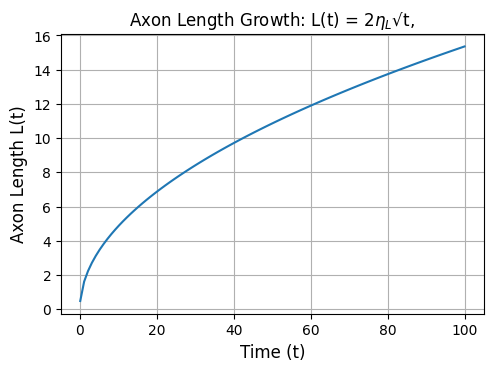

In [14]:
# Time array
t = np.linspace(0.1, 100, 100)

# Calculate L(t) = 2x√t = 2√t (when x = 1)
L_t = 2 * x * np.sqrt(t)

# Create the main plot
plt.figure(figsize=(12, 8))

# Main plot: L(t) vs t
plt.subplot(2, 2, 1)
plt.plot(t, L_t)
plt.xlabel('Time (t)', fontsize=12)
plt.ylabel('Axon Length L(t)', fontsize=12)
plt.title('Axon Length Growth: L(t) = 2$\eta_L$√t, ')
plt.grid()